In [1]:
# Standard imports
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database


100% 775M/778M [00:19<00:00, 41.5MB/s]
100% 778M/778M [00:19<00:00, 41.0MB/s]


In [7]:
! ls

covid19-radiography-database.zip  kaggle.json  sample_data


In [8]:
! unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [9]:
import pandas as pd
import os


filenames = os.listdir("COVID-19_Radiography_Dataset/COVID/images")
categories = []
for filename in filenames:
  categories.append(0)

df1 = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

# Note: this randomizes the filenames

In [10]:
df1.head(5)

,filename,category
0,COVID-2822.png,0
1,COVID-2349.png,0
2,COVID-2161.png,0
3,COVID-2271.png,0
4,COVID-2725.png,0


In [11]:
len(df1)

3616

In [12]:
categories2=[]
filenames2 = os.listdir("COVID-19_Radiography_Dataset/Lung_Opacity/images") # TB images categorized as 1
for filename in filenames2:
  categories2.append(1)

df2 = pd.DataFrame({
    'filename': filenames2,
    'category': categories2
})

In [13]:
df2.head(5)

,filename,category
0,Lung_Opacity-3158.png,1
1,Lung_Opacity-5728.png,1
2,Lung_Opacity-3657.png,1
3,Lung_Opacity-1064.png,1
4,Lung_Opacity-1603.png,1


In [14]:
len(df2)

6012

In [15]:
categories3=[]
filenames3 = os.listdir("COVID-19_Radiography_Dataset/Normal/images") # TB images categorized as 1
for filename in filenames3:
  categories3.append(2)

df3 = pd.DataFrame({
    'filename': filenames3,
    'category': categories3
})

In [16]:
df3.head(5)

,filename,category
0,Normal-6209.png,2
1,Normal-2051.png,2
2,Normal-6824.png,2
3,Normal-5965.png,2
4,Normal-8114.png,2


In [17]:
len(df3)

10192

In [18]:
categories4=[]
filenames4 = os.listdir("COVID-19_Radiography_Dataset/Viral Pneumonia/images") # TB images categorized as 1
for filename in filenames4:
  categories4.append(3)

df4 = pd.DataFrame({
    'filename': filenames4,
    'category': categories4
})

In [19]:
df4.head(5)

,filename,category
0,Viral Pneumonia-886.png,3
1,Viral Pneumonia-1028.png,3
2,Viral Pneumonia-242.png,3
3,Viral Pneumonia-53.png,3
4,Viral Pneumonia-936.png,3


In [20]:
len(df4)

1345

In [21]:
# Adding the two dataframes along rows
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

In [22]:
df.head(5)

,filename,category
0,COVID-2822.png,0
1,COVID-2349.png,0
2,COVID-2161.png,0
3,COVID-2271.png,0
4,COVID-2725.png,0


In [23]:
len(df)

21165

In [24]:
df['filename']

0                  COVID-2822.png
1                  COVID-2349.png
2                  COVID-2161.png
3                  COVID-2271.png
4                  COVID-2725.png
                   ...           
21160    Viral Pneumonia-1168.png
21161     Viral Pneumonia-773.png
21162     Viral Pneumonia-159.png
21163     Viral Pneumonia-538.png
21164    Viral Pneumonia-1284.png
Name: filename, Length: 21165, dtype: object

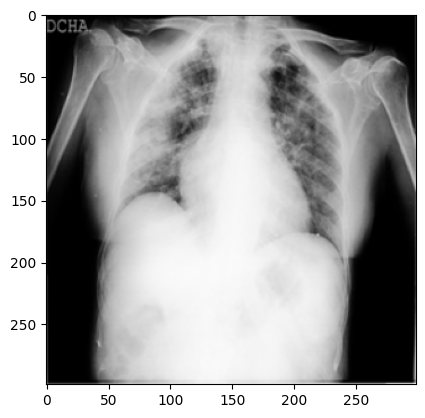

In [25]:
# <=3615 Covid

# >=3616 but < 9628 = Lung_Opacity

# >=9628 but < 19820 = Normal

# >=19820 Viral Pneumonia
#Showing a sample X ray image


import matplotlib.pyplot as plt
import cv2

# Assuming df['filename'][36] contains the filename of the image
image_path = 'COVID-19_Radiography_Dataset/COVID/images/' + df['filename'][3615]

# Read the image in RGB format
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)
plt.show()


In [26]:
# Resizing images and storing in X numpy array
import numpy as np
import cv2

def resize_img(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (80,80))  # This tuple represents the final image size desired

X = np.ndarray((21165,80,80,3)) # 4200 images, 80x80 pixels, 3 channels (RGB)
i=0
for image_file in df1['filename']:
    X[i,:] = resize_img('COVID-19_Radiography_Dataset/COVID/images/'+image_file)
    i+=1

for image_file in df2['filename']:
    X[i,:] = resize_img('COVID-19_Radiography_Dataset/Lung_Opacity/images/'+image_file)
    i+=1

for image_file in df3['filename']:
    X[i,:] = resize_img('COVID-19_Radiography_Dataset/Normal/images/'+image_file)
    i+=1

for image_file in df4['filename']:
    X[i,:] = resize_img('COVID-19_Radiography_Dataset/Viral Pneumonia/images/'+image_file)
    i+=1

In [27]:
import numpy as np

# Assuming X is your 4D array with shape (4200, 80, 80, 3)
# Check if any row has zero values along the last axis (axis 3)
has_zeros = np.any(X == 0, axis=(1, 2, 3))

# Print the indices of rows with zero values
print("Rows with zero values:", np.where(has_zeros)[0])

# Count the number of rows with zero values
num_rows_with_zeros = np.sum(has_zeros)
print("Number of rows with zero values:", num_rows_with_zeros)

# Check if all rows are filled (no zero values)
all_rows_filled = not np.any(has_zeros)
print("All rows filled:", all_rows_filled)

Rows with zero values: [    0     2     3 ... 21161 21162 21163]
Number of rows with zero values: 15904
All rows filled: False


In [28]:
X.shape

(21165, 80, 80, 3)

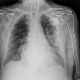

In [29]:
from google.colab.patches import cv2_imshow
cv2_imshow(X[2])

In [30]:
from sklearn.model_selection import train_test_split

# Training, validation, and testing datasets sizes
#train_size = 15000
#validation_size = 5000
#test_size = 5000

# Splitting the data into training and remaining sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X, df['category'], test_size=0.3, random_state=42, stratify=df['category'])

# Splitting the remaining into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42, stratify=y_remaining)

# Checking the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_validation shape:", y_validation.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14815, 80, 80, 3)
y_train shape: (14815,)
X_validation shape: (3175, 80, 80, 3)
y_validation shape: (3175,)
X_test shape: (3175, 80, 80, 3)
y_test shape: (3175,)


In [31]:
type(y_test)

pandas.core.series.Series

In [32]:
value_counts = y_test.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


2    1529
1     902
0     542
3     202
Name: category, dtype: int64
Count of 0: 542
Count of 1: 902


In [33]:
value_counts = y_validation.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


2    1529
1     902
0     543
3     201
Name: category, dtype: int64
Count of 0: 543
Count of 1: 902


In [34]:
value_counts = y_train.value_counts()

# Display the counts
print(value_counts)

count_0 = value_counts.get(0, 0)  # Count of 0, defaulting to 0 if 0 is not present
count_1 = value_counts.get(1, 0)  # Count of 1, defaulting to 0 if 1 is not present

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


2    7134
1    4208
0    2531
3     942
Name: category, dtype: int64
Count of 0: 2531
Count of 1: 4208


XceptionNet

In [35]:
X_train.shape

(14815, 80, 80, 3)

In [36]:
# Resize after preprocessing to keep full dataset
X_train_X = tf.image.resize(X_train, [71,71])
X_valid_X = tf.image.resize(X_validation, [71,71])
X_test_X = tf.image.resize(X_test, [71,71])

In [37]:
X_train_X.shape

TensorShape([14815, 71, 71, 3])

In [38]:
# Try Xception
# Data augmentation, global pooling and dropout
base_model_2X = keras.applications.Xception(weights="imagenet",
                                              include_top=False,
                                         input_shape=(71,71,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model_2X.output)
dropout = keras.layers.Dropout(0.05)(global_avg)
output = keras.layers.Dense(4, activation="softmax")(dropout)
model_2X = keras.models.Model(inputs=base_model_2X.input, outputs=output)

83683744/83683744 [==============================] - 3s 0us/step


In [39]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, horizontal_flip=True, brightness_range=[0.8, 1.2])

In [40]:
# Freeze transferred layers and train
%%time
for layer in base_model_2X.layers:
    layer.trainable = False

model_2X.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-3),
                metrics=["accuracy"])

history_2X = model_2X.fit(datagen.flow(X_train_X, y_train, batch_size=32),
                    epochs=50, validation_data=(X_valid_X, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])


Epoch 1/50
463/463 [==============================] - 37s 57ms/step - loss: 2.3411 - accuracy: 0.5761 - val_loss: 1.3703 - val_accuracy: 0.6926
Epoch 2/50
463/463 [==============================] - 26s 55ms/step - loss: 1.5957 - accuracy: 0.6292 - val_loss: 0.8723 - val_accuracy: 0.7124
Epoch 3/50
463/463 [==============================] - 25s 55ms/step - loss: 1.3772 - accuracy: 0.6493 - val_loss: 0.9922 - val_accuracy: 0.6658
Epoch 4/50
463/463 [==============================] - 25s 54ms/step - loss: 1.2748 - accuracy: 0.6589 - val_loss: 1.1913 - val_accuracy: 0.7017
Epoch 5/50
463/463 [==============================] - 25s 53ms/step - loss: 1.1816 - accuracy: 0.6661 - val_loss: 1.2226 - val_accuracy: 0.6646
Epoch 6/50
463/463 [==============================] - 25s 54ms/step - loss: 1.1003 - accuracy: 0.6750 - val_loss: 1.0111 - val_accuracy: 0.7046
Epoch 7/50
463/463 [==============================] - 25s 55ms/step - loss: 1.0934 - accuracy: 0.6715 - val_loss: 1.0076 - val_accuracy:

In [41]:
# Unfreeze layers and train
%%time
for layer in base_model_2X.layers:
    layer.trainable = True

model_2X.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4), # need smaller lr
                metrics=["accuracy"])

n_epochs = 100
batch_size = 32
history_2X = model_2X.fit(datagen.flow(X_train_X, y_train, batch_size=batch_size),
                    epochs=n_epochs,
                    validation_data=(X_valid_X, y_validation),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

Epoch 1/100
463/463 [==============================] - 67s 61ms/step - loss: 0.5460 - accuracy: 0.7890 - val_loss: 0.3247 - val_accuracy: 0.8920
Epoch 2/100
463/463 [==============================] - 27s 59ms/step - loss: 0.3199 - accuracy: 0.8853 - val_loss: 0.2955 - val_accuracy: 0.8942
Epoch 3/100
463/463 [==============================] - 27s 59ms/step - loss: 0.2669 - accuracy: 0.9029 - val_loss: 0.2892 - val_accuracy: 0.9020
Epoch 4/100
463/463 [==============================] - 27s 59ms/step - loss: 0.2273 - accuracy: 0.9150 - val_loss: 0.3053 - val_accuracy: 0.9027
Epoch 5/100
463/463 [==============================] - 28s 60ms/step - loss: 0.2073 - accuracy: 0.9238 - val_loss: 0.2539 - val_accuracy: 0.9112
Epoch 6/100
463/463 [==============================] - 28s 61ms/step - loss: 0.1800 - accuracy: 0.9349 - val_loss: 0.2744 - val_accuracy: 0.9068
Epoch 7/100
463/463 [==============================] - 28s 60ms/step - loss: 0.1621 - accuracy: 0.9407 - val_loss: 0.2882 - val_ac

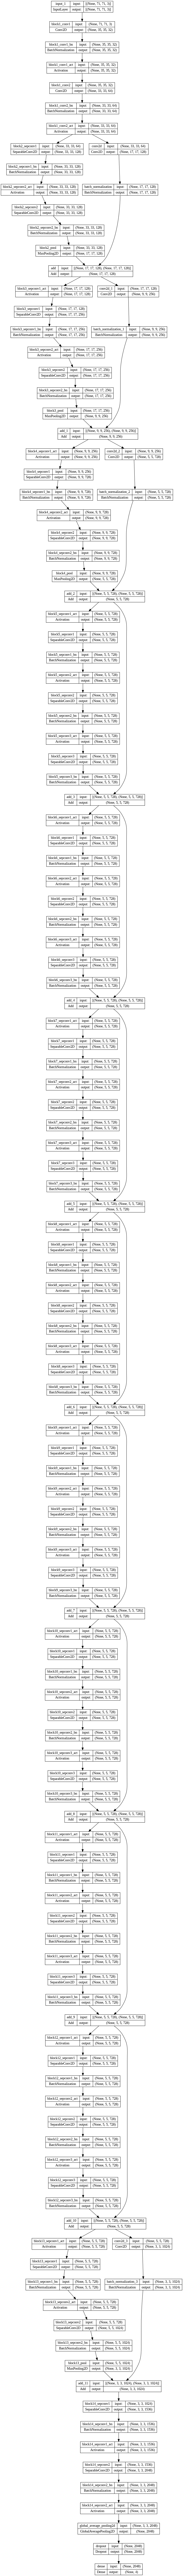

In [42]:
keras.utils.plot_model(model_2X, show_shapes=True)

In [43]:
# Printing validation set accuracy
val_loss, val_accuracy = model_2X.evaluate(X_validation, y_validation)
print(f"Validation Accuracy: {val_accuracy:.4f}")

100/100 [==============================] - 2s 11ms/step - loss: 0.3486 - accuracy: 0.8737
Validation Accuracy: 0.8737


In [44]:
# Printing test set accuracy
model_2X.evaluate(X_test, y_test)

100/100 [==============================] - 1s 10ms/step - loss: 0.3607 - accuracy: 0.8665


[0.36069852113723755, 0.8664566874504089]

In [45]:
# Save accuracy and validation accuracy for each epoch
accuracy_values_2X = history_2X.history["accuracy"]
val_accuracy_values_2X = history_2X.history["val_accuracy"]

In [46]:
from skimage.transform import resize

# Assuming X_test contains images
resized_X_test = np.array([resize(image, (71, 71, 3)) for image in X_test])

# Predict on the resized test set
y_pred = model_2X.predict(resized_X_test)


100/100 [==============================] - 2s 9ms/step


In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
# y_pred = model_2X.predict(X_test)

# Convert one-hot encoded predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the labels in y_test to numpy array
y_test_np = np.array(y_test)

# Display classification report
report = classification_report(y_test_np, y_pred_classes, target_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'])
print("Classification Report:\n", report)

# Display confusion matrix
cm = confusion_matrix(y_test_np, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Calculate accuracy for each class
class_labels = ['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia']
accuracy_per_class = {}

for i, label in enumerate(class_labels):
    class_index = i
    correct_predictions = np.sum((y_pred_classes == class_index) & (y_test_np == class_index))
    total_samples = np.sum(y_test_np == class_index)
    accuracy = correct_predictions / total_samples
    accuracy_per_class[label] = accuracy
    print(f"Accuracy for {label}: {accuracy:.4f}")

# Display overall accuracy
overall_accuracy = accuracy_score(y_test_np, y_pred_classes)
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")

Classification Report:
                  precision    recall  f1-score   support

          COVID       0.98      0.82      0.89       542
   Lung_Opacity       0.91      0.86      0.89       902
         Normal       0.89      0.97      0.93      1529
Viral_Pneumonia       0.97      0.91      0.94       202

       accuracy                           0.91      3175
      macro avg       0.94      0.89      0.91      3175
   weighted avg       0.92      0.91      0.91      3175

Confusion Matrix:
 [[ 447   38   57    0]
 [   6  778  116    2]
 [   4   34 1488    3]
 [   1    1   17  183]]
Accuracy for COVID: 0.8247
Accuracy for Lung_Opacity: 0.8625
Accuracy for Normal: 0.9732
Accuracy for Viral_Pneumonia: 0.9059

Overall Accuracy: 0.9121


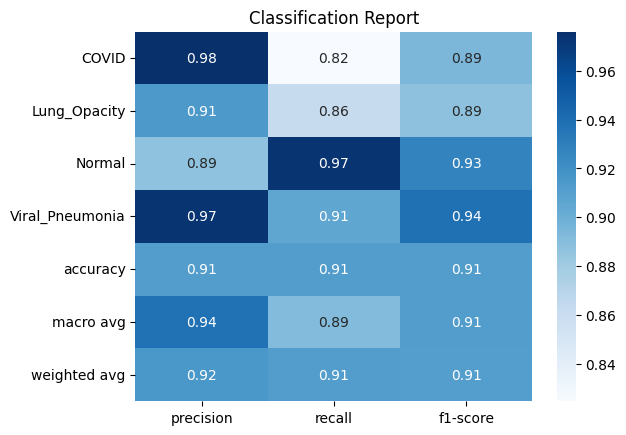

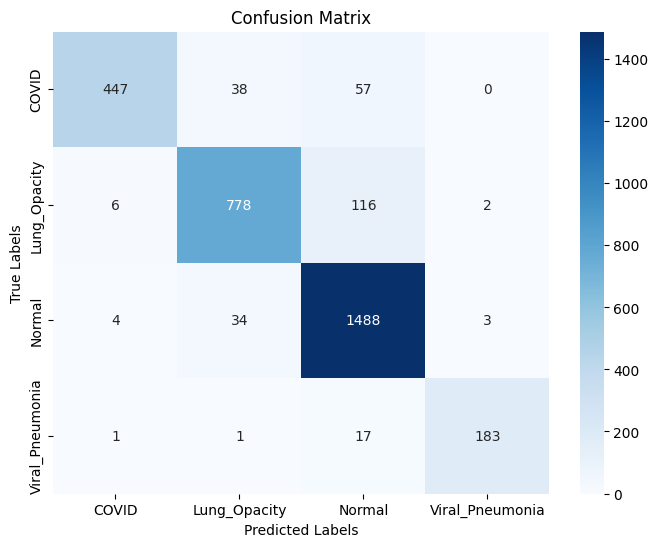

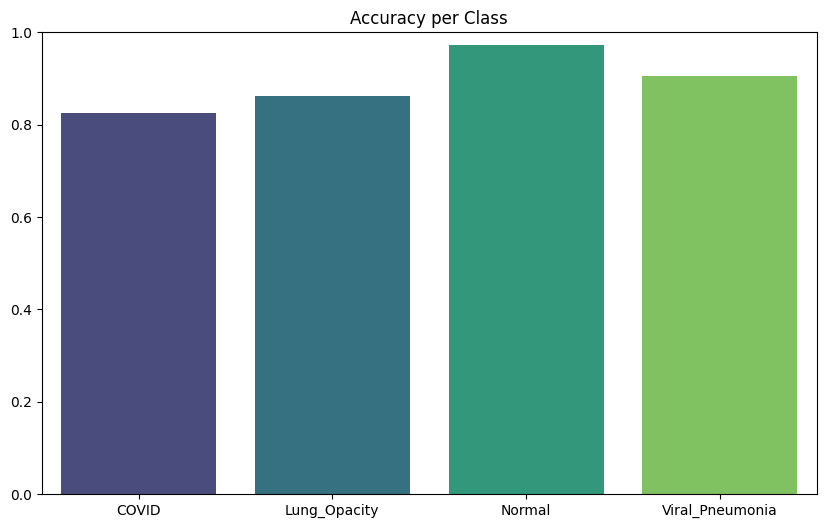


Overall Accuracy: 0.9121


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
#y_pred = model_1X.predict(X_test)

# Convert one-hot encoded predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the labels in y_test to numpy array
y_test_np = np.array(y_test)

# Display classification report with a heatmap
report = classification_report(y_test_np, y_pred_classes, target_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'], output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.show()

# Display confusion matrix with a heatmap
cm = confusion_matrix(y_test_np, y_pred_classes, labels=[0, 1, 2, 3])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", xticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'], yticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral_Pneumonia'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot accuracy for each class
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_per_class.keys()), y=list(accuracy_per_class.values()), palette="viridis")
plt.title("Accuracy per Class")
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy as a percentage
plt.show()

# Display overall accuracy
print(f"\nOverall Accuracy: {overall_accuracy:.4f}")